In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/train (3).csv')                                       #importing the csv data file

In [3]:
train_df

,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
0,MI,36,510,0,0,0,193.08,88,35.56,228.34,109,26.68,200.51,126,10.03,12.54,6,3.27,1,0
1,TN,16,510,0,0,0,165.62,69,30.50,246.13,95,28.76,150.08,99,7.51,12.30,9,3.21,1,0
2,DC,99,415,0,0,0,216.22,70,39.83,115.62,110,13.51,236.66,87,11.84,13.11,2,3.42,3,0
3,WY,159,510,0,0,0,182.16,85,33.56,218.48,126,25.54,201.62,133,10.08,9.32,2,2.43,1,0
4,NJ,77,510,0,0,0,134.16,98,24.72,230.27,139,26.92,244.35,140,12.22,15.76,3,4.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,VA,117,415,0,1,38,280.32,100,51.63,263.17,75,30.77,272.71,132,13.64,10.58,1,2.76,3,0
3463,MI,110,415,1,0,0,317.08,84,58.40,201.98,95,23.61,270.28,96,13.52,16.68,4,4.36,0,1
3464,IN,136,415,0,1,21,193.95,93,35.73,194.05,103,22.68,324.76,127,16.24,10.92,4,2.86,2,0
3465,KY,93,415,0,1,37,249.08,101,45.88,166.62,94,19.48,181.27,95,9.07,11.96,10,3.12,3,0


<ipython-input-4-e1d0eead9d78>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train_df.corr()


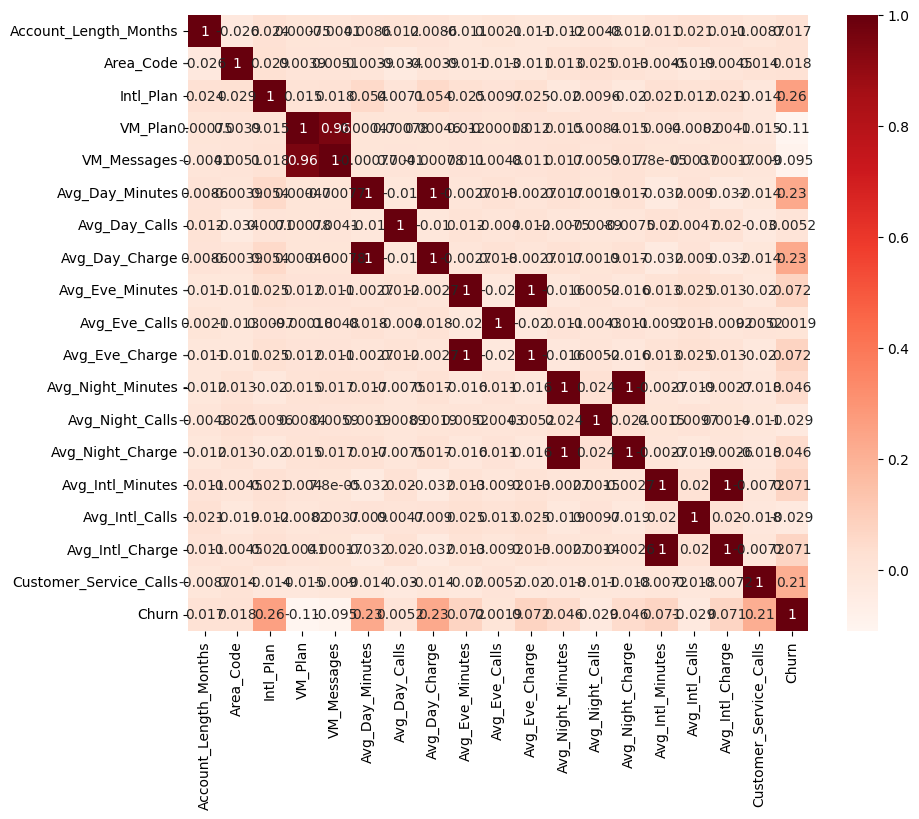

In [4]:
#plotting the Correlation analysis graph

plt.figure(figsize=(10,8))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#dropping the columns as they are related with another columns as showm by
train_df.drop(columns = ['VM_Messages','Avg_Day_Minutes','Avg_Night_Minutes','Avg_Intl_Minutes','Avg_Eve_Minutes'],inplace = True)

<ipython-input-6-42e87c157f53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train_df.corr()


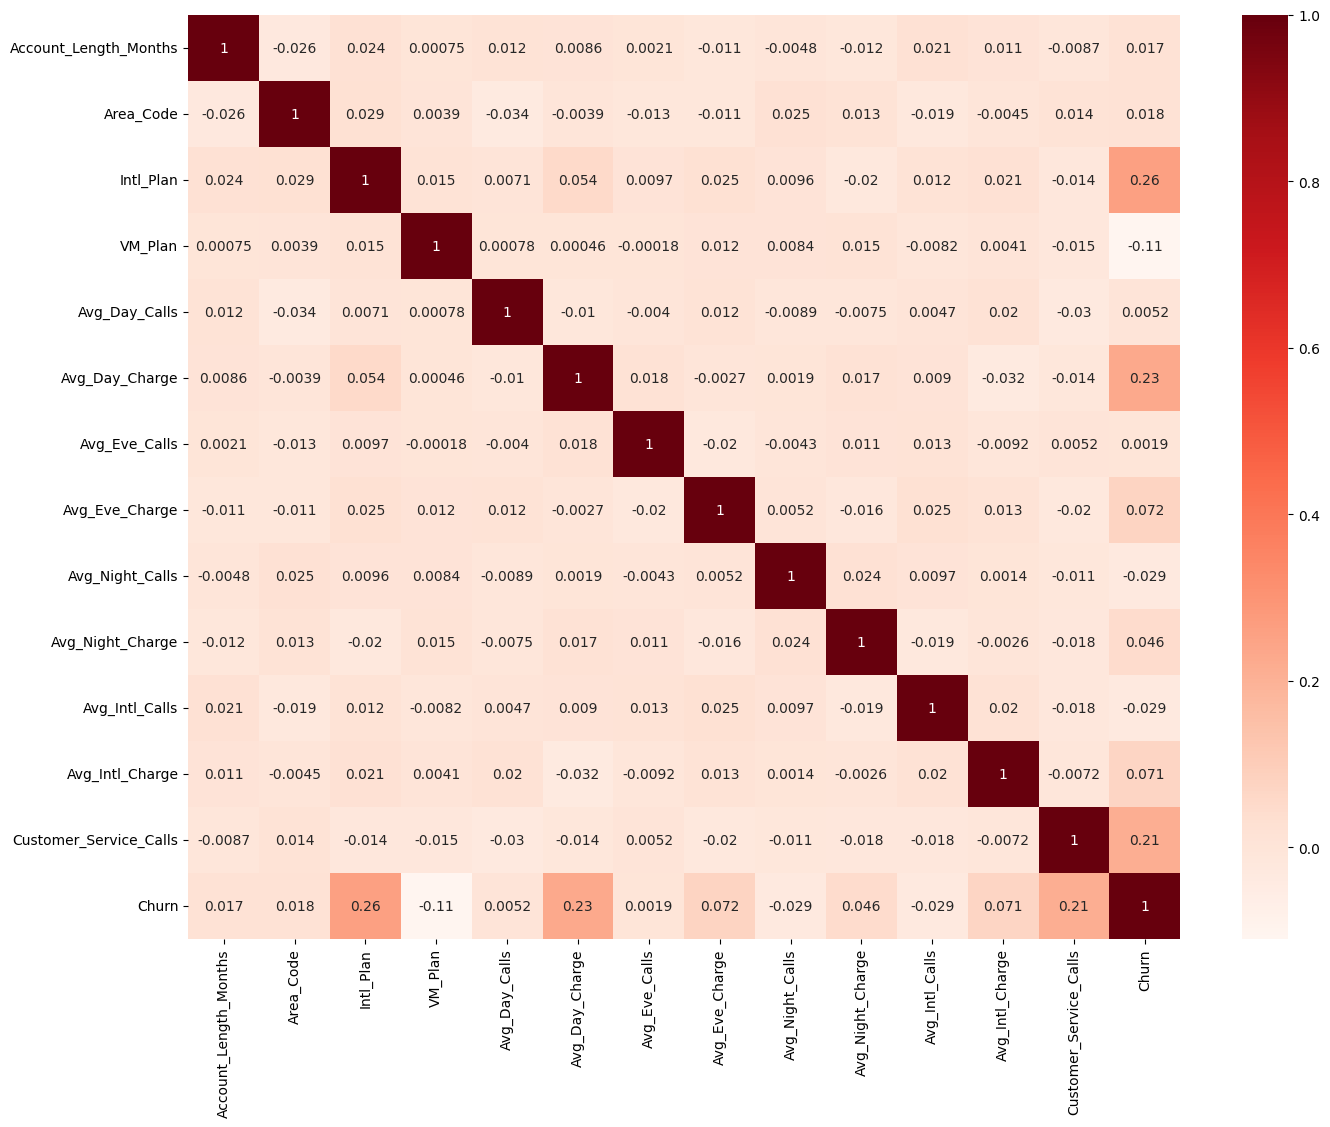

In [6]:
#plotting the correaltion graph after dropping
plt.figure(figsize=(16,12))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#defining the some dataset that we will use entire the operation

y = train_df[train_df['Churn']==1]
q = train_df[train_df['Churn']==0]
train_df.isnull().sum()
total = train_df.shape[0]

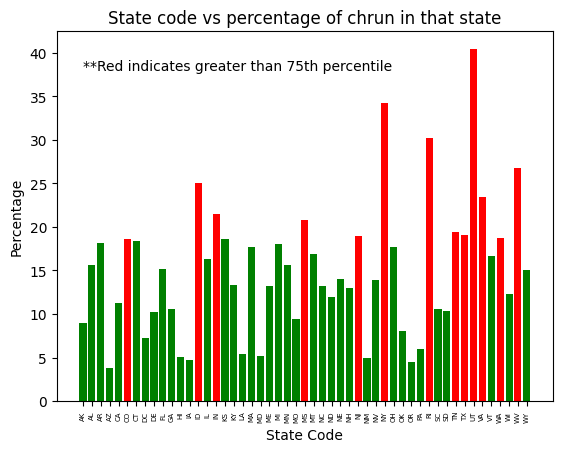

The Median of percentage is : 15.0
The 75th percentile of the list is: 18.60774818401937


In [8]:
#------------------Plotting the Graph for churn in a specific state code----------------------------#

area_churn_counts = train_df.groupby('State_Code')['Churn'].sum().reset_index() #requuired dataset
State_Counts = train_df['State_Code'].value_counts()

#counting the number of times a state code appeared
counting =  []
for i in train_df['State_Code'].unique():
 State_Cata = len(train_df[train_df['State_Code'] == i])
 counting.append(State_Cata)


#finding the median of the percentage Churn
percentage = []
for i in range(len(counting)):
  percentage.append(area_churn_counts.Churn.at[i]/counting[i]*100)

standard_devi = (st.median(percentage))
percentile_75 = np.percentile(percentage, 75)


#decideing the color of the bar
color = []
for i in range(len(percentage)):
  if percentage[i]>percentile_75:
    color.append('red')
  else:
    color.append('green')

#graph plot
plt.bar(area_churn_counts.State_Code,area_churn_counts.Churn/counting*100, color = color)
plt.xticks(rotation=90, fontsize = 5)
plt.xlabel("State Code")
plt.ylabel("Percentage")
plt.title('State code vs percentage of chrun in that state')
plt.text(0.01,38 ,"**Red indicates greater than 75th percentile")
plt.show()

print(f'The Median of percentage is : {standard_devi}')
print(f"The 75th percentile of the list is: {percentile_75}")



Here we have made a bar graph for churn=1 for every state also we have indicated the states with more the 75th percentile c

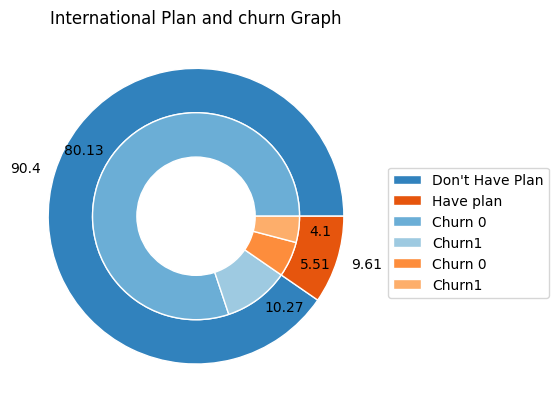

In [9]:
#--------plotting the grapgh for international plan----------#

intl_plan = train_df[train_df['Intl_Plan'] == 1]
Churn_of_people_with_intl_plan = (intl_plan['Churn'] == 1).sum()
total_people_intl_plan = len(intl_plan)
Churn_of_people_without_plan_intl_plan = ((train_df[train_df['Intl_Plan'] == 0])["Churn"]==1).sum()


#plotting graph
fig, ax = plt.subplots()
size = 0.3
vals = np.array([[total-total_people_intl_plan-Churn_of_people_without_plan_intl_plan,Churn_of_people_without_plan_intl_plan],[total_people_intl_plan-Churn_of_people_with_intl_plan,Churn_of_people_with_intl_plan]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])
inner_label = [((total-total_people_intl_plan-Churn_of_people_without_plan_intl_plan)*100/total).round(2), (Churn_of_people_without_plan_intl_plan*100/total).round(2),((total_people_intl_plan-Churn_of_people_with_intl_plan)*100/total).round(2), ((Churn_of_people_with_intl_plan)/total*100).round(2)]
outer_label = [(inner_label[0]+inner_label[1]).round(2),inner_label[3]+inner_label[2]]

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels =outer_label,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, labels=inner_label,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='International Plan and churn Graph')
plt.legend(['Don\'t Have Plan',"Have plan",'Churn 0','Churn1','Churn 0','Churn1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

The median of the Customer_Service_Calls with Churn 0 is: Customer_Service_Calls    1.0
dtype: float64
The median of the Customer_Service_Calls with Churn 1 is : Customer_Service_Calls    2.0
dtype: float64


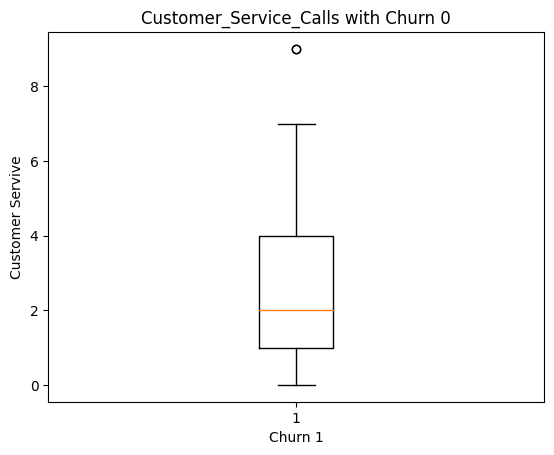

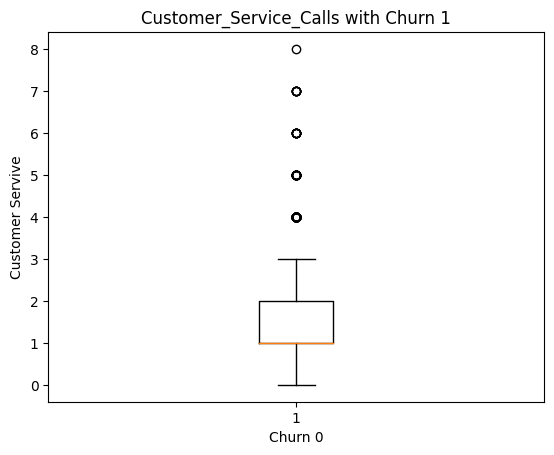

In [10]:
#plotting box and whisker graph for customer service call

x = y[['Customer_Service_Calls']]
w = q[['Customer_Service_Calls']]
print(f'The median of the Customer_Service_Calls with Churn 0 is: {w.median(axis=0)}')
print(f'The median of the Customer_Service_Calls with Churn 1 is : {x.median(axis=0)}')

#plot for Customer_Service_Calls with Churn 0
plt.boxplot(x)
plt.xlabel('Churn 1')
plt.ylabel('Customer Servive')
plt.title('Customer_Service_Calls with Churn 0')
plt.show()

#plot for Customer_Service_Calls with Churn 1
plt.boxplot(w)
plt.xlabel('Churn 0')
plt.ylabel('Customer Servive')
plt.title('Customer_Service_Calls with Churn 1')
plt.show()

The median of the Avg_Day_Charge with Churn 0 is: Avg_Day_Charge    35.59
dtype: float64
The median of the Avg_Day_Charge with Churn 1 is : Avg_Day_Charge    44.28
dtype: float64


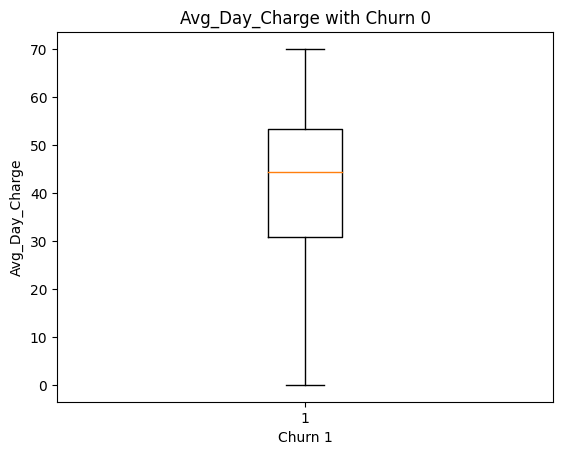

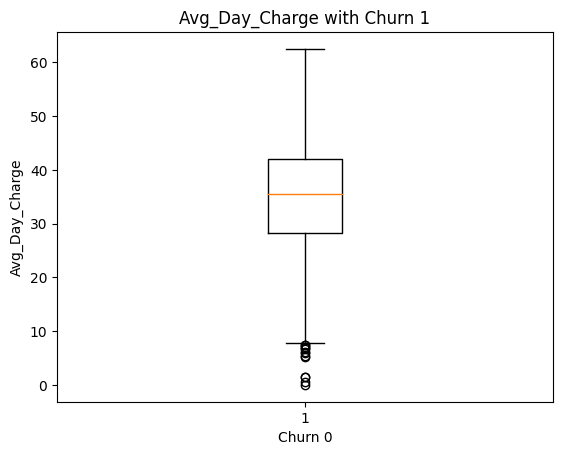

In [11]:
#plotting box and whisker graph for avg day churn
x = y[['Avg_Day_Charge']]
w = q[['Avg_Day_Charge']]
print(f'The median of the Avg_Day_Charge with Churn 0 is: {w.median(axis=0)}')
print(f'The median of the Avg_Day_Charge with Churn 1 is : {x.median(axis=0)}')

#plot for Customer_Service_Calls with Churn 0
plt.boxplot(x)
plt.xlabel('Churn 1')
plt.ylabel('Avg_Day_Charge')
plt.title('Avg_Day_Charge with Churn 0')
plt.show()

#plot for Customer_Service_Calls with Churn 1
plt.boxplot(w)
plt.xlabel('Churn 0')
plt.ylabel('Avg_Day_Charge')
plt.title('Avg_Day_Charge with Churn 1')
plt.show()

<ipython-input-12-a89b727bd58f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = n.corr()


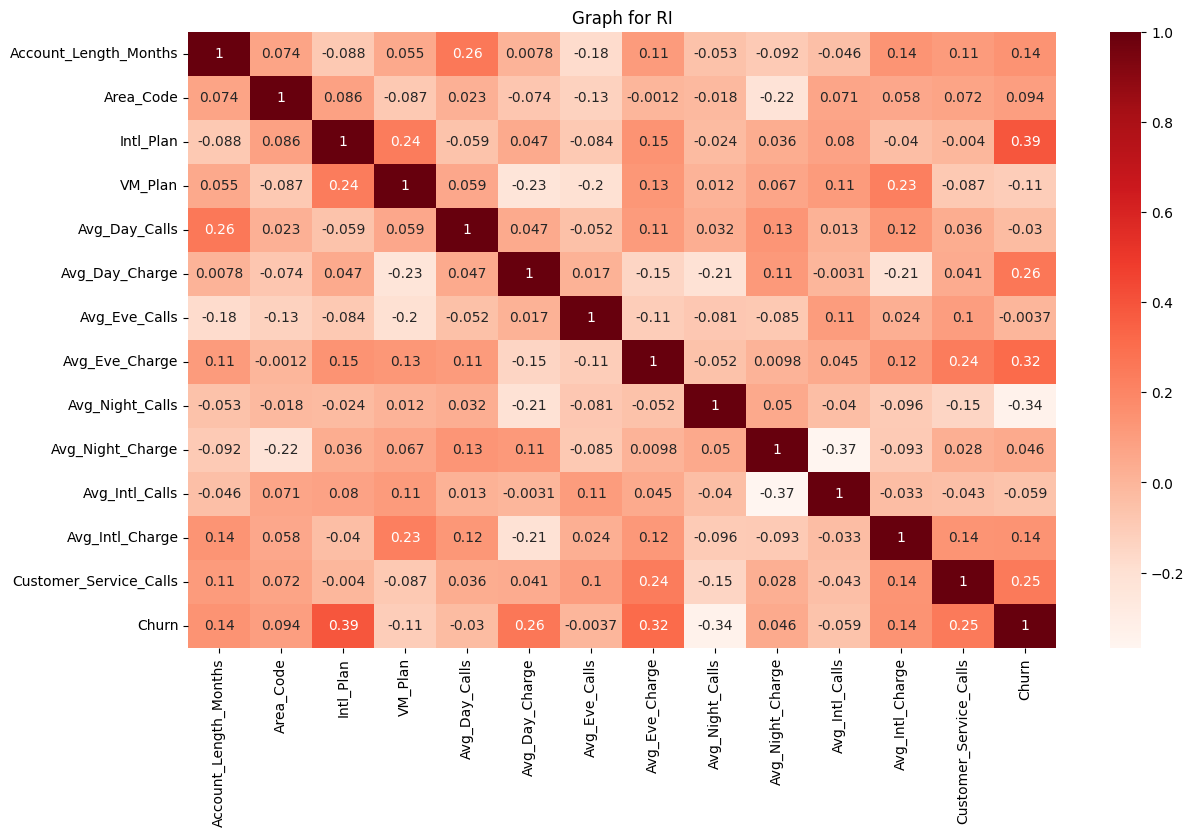

<ipython-input-12-a89b727bd58f>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = n.corr()


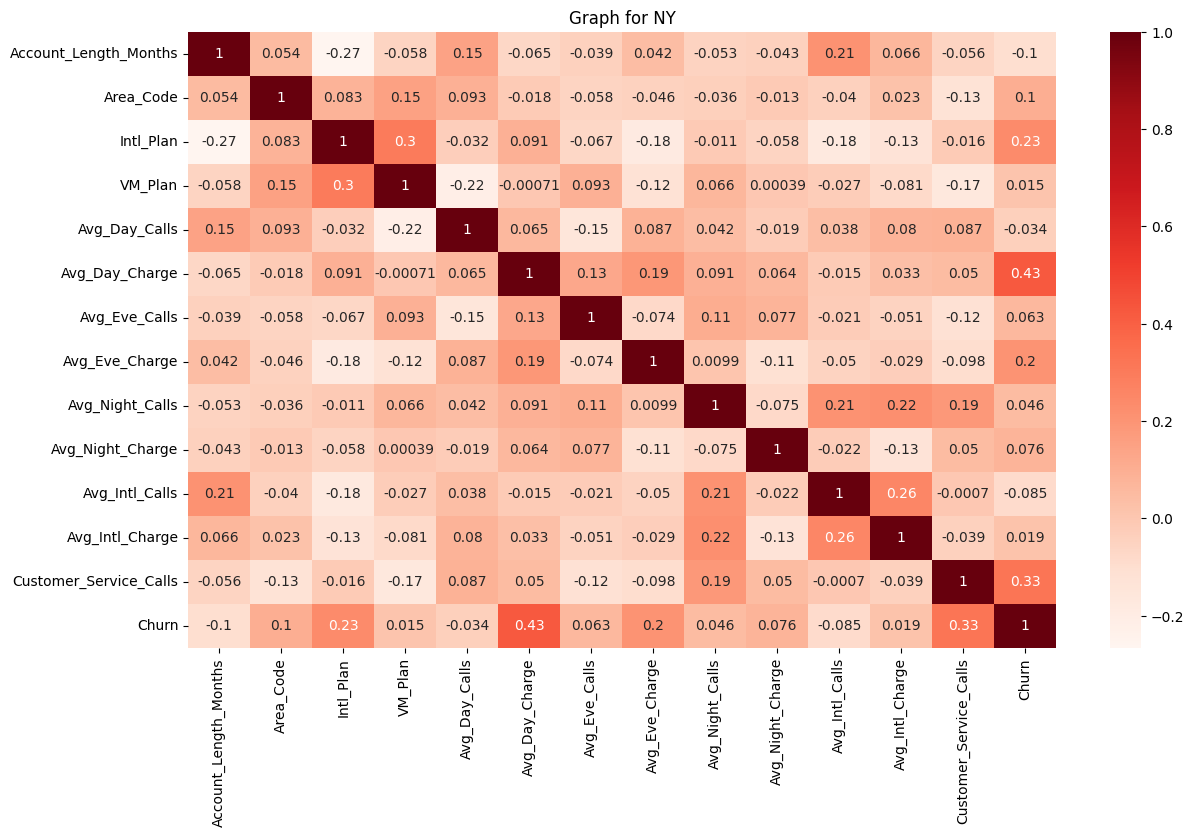

<ipython-input-12-a89b727bd58f>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = n.corr()


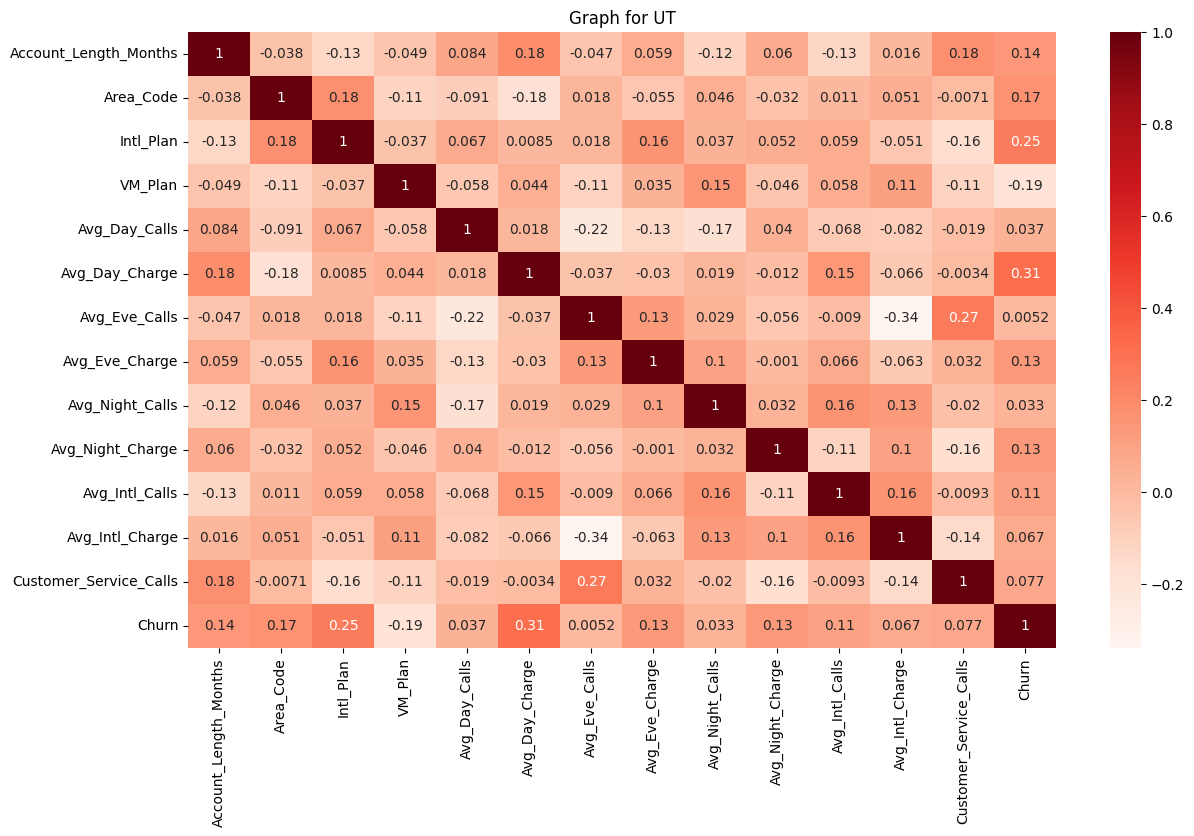

In [12]:
#plotting the correlatpion graph for state code RI , NY , UT

#for RI
n = train_df[train_df['State_Code'] == 'RI']
plt.figure(figsize=(14,8))
cor = n.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Graph for RI')
plt.show()

#for NY
n = train_df[train_df['State_Code'] == 'NY']
plt.figure(figsize=(14,8))
cor = n.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Graph for NY')
plt.show()

#for UT
n = train_df[train_df['State_Code'] == 'UT']
plt.figure(figsize=(14,8))
cor = n.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Graph for UT')
plt.show()

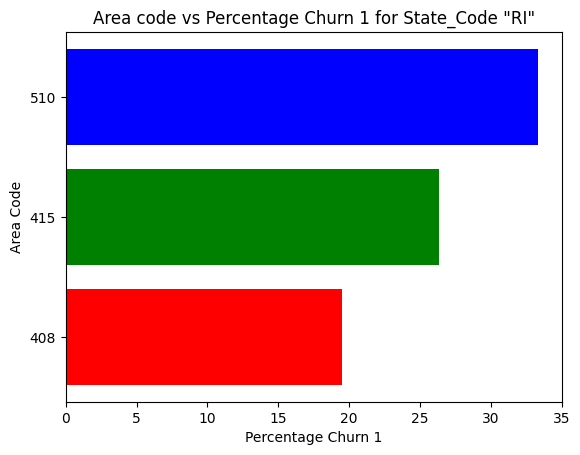

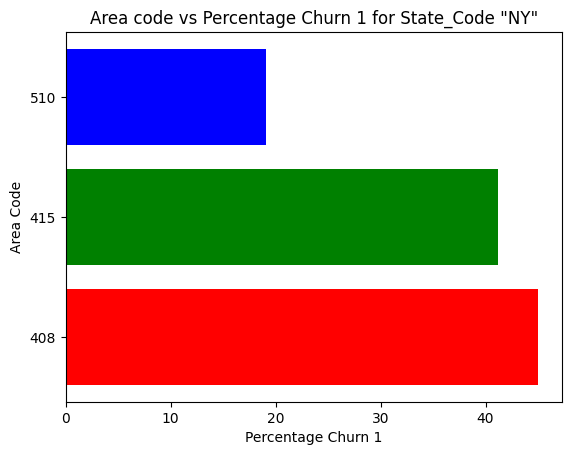

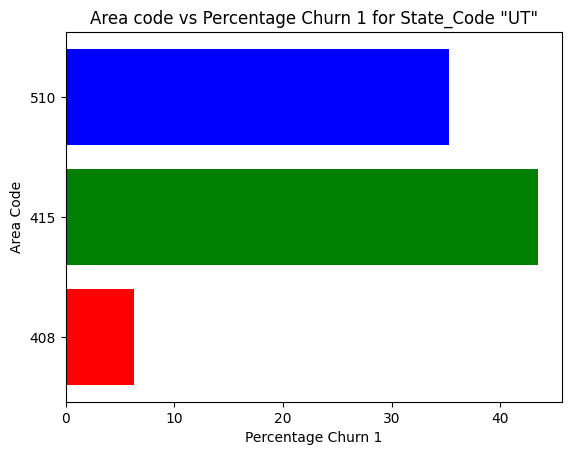

In [13]:
#plotting Area code graph for state_code RI, UT, NY

#for RI
n = train_df[train_df['State_Code'] == 'RI']
counting_area_code =  []
for i in n['Area_Code'].unique():
 State_Cata = len(n[n['Area_Code'] == i])
 counting_area_code.append(State_Cata)
color = ['red','green','blue']
Area_code_churn = n.groupby('Area_Code')['Churn'].sum().reset_index()
plt.barh(['408','415','510'],Area_code_churn.Churn/counting_area_code*100,color = color)
plt.title('Area code vs Percentage Churn 1 for State_Code "RI"')
plt.xlabel('Percentage Churn 1')
plt.ylabel('Area Code')
plt.show()

n = train_df[train_df['State_Code'] == 'NY']
counting_area_code =  []
for i in n['Area_Code'].unique():
 State_Cata = len(n[n['Area_Code'] == i])
 counting_area_code.append(State_Cata)
color = ['red','green','blue']
Area_code_churn = n.groupby('Area_Code')['Churn'].sum().reset_index()
plt.barh(['408','415','510'],Area_code_churn.Churn/counting_area_code*100,color = color)
plt.title('Area code vs Percentage Churn 1 for State_Code "NY"')
plt.xlabel('Percentage Churn 1')
plt.ylabel('Area Code')
plt.show()

n = train_df[train_df['State_Code'] == 'UT']
counting_area_code =  []
for i in n['Area_Code'].unique():
 State_Cata = len(n[n['Area_Code'] == i])
 counting_area_code.append(State_Cata)
color = ['red','green','blue']
Area_code_churn = n.groupby('Area_Code')['Churn'].sum().reset_index()
plt.barh(['408','415','510'],Area_code_churn.Churn/counting_area_code*100,color = color)
plt.title('Area code vs Percentage Churn 1 for State_Code "UT"')
plt.xlabel('Percentage Churn 1')
plt.ylabel('Area Code')
plt.show()

# From Now there is not much any useful insights, we've plotted it so we've mention it here.

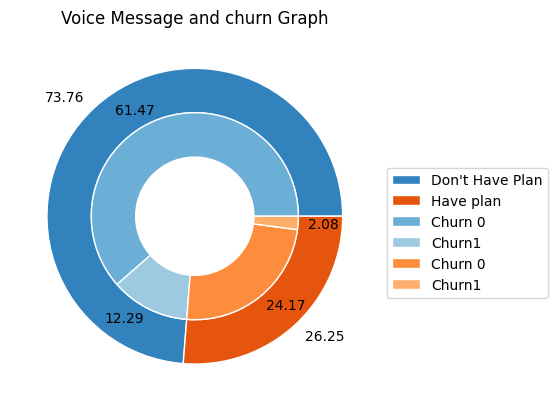

In [14]:
#plotting grapgh for Voice Plan

#defining terms
voice_plan = train_df[train_df['VM_Plan'] == 1]
Churn_of_people_with_VMPLAN = (voice_plan['Churn'] == 1).sum()
total_people = len(voice_plan)
total = train_df.shape[0]
Churn_of_people_withour_plan = ((train_df[train_df['VM_Plan'] == 0])["Churn"]==1).sum()


#graph plot
fig, ax = plt.subplots()
size = 0.3
vals = np.array([[total-total_people-Churn_of_people_withour_plan,Churn_of_people_withour_plan],[total_people-Churn_of_people_with_VMPLAN,Churn_of_people_with_VMPLAN]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])
inner_label = [((total-total_people-Churn_of_people_withour_plan)*100/total).round(2), (Churn_of_people_withour_plan*100/total).round(2),((total_people-Churn_of_people_with_VMPLAN)*100/total).round(2), ((Churn_of_people_with_VMPLAN)/total*100).round(2)]
outer_label = [(inner_label[0]+inner_label[1]).round(2),inner_label[3]+inner_label[2]]

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels =outer_label,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, labels=inner_label,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Voice Message and churn Graph')
plt.legend(['Don\'t Have Plan',"Have plan",'Churn 0','Churn1','Churn 0','Churn1'],bbox_to_anchor=(1,0.65), ncol=1)
plt.show()

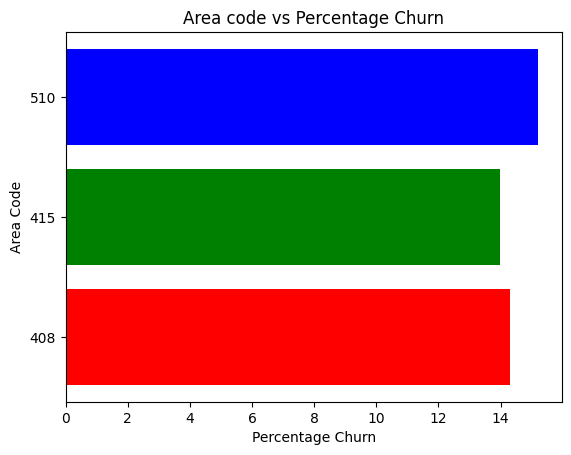

In [15]:
counting_area_code =  []
for i in train_df['Area_Code'].unique():
 State_Cata = len(train_df[train_df['Area_Code'] == i])
 counting_area_code.append(State_Cata)
color = ['red','green','blue']
Area_code_churn = train_df.groupby('Area_Code')['Churn'].sum().reset_index()
plt.barh(['408','415','510'],Area_code_churn.Churn/counting_area_code*100,color = color)
plt.ylabel('Area Code')
plt.xlabel('Percentage Churn')
plt.title('Area code vs Percentage Churn')
plt.show()

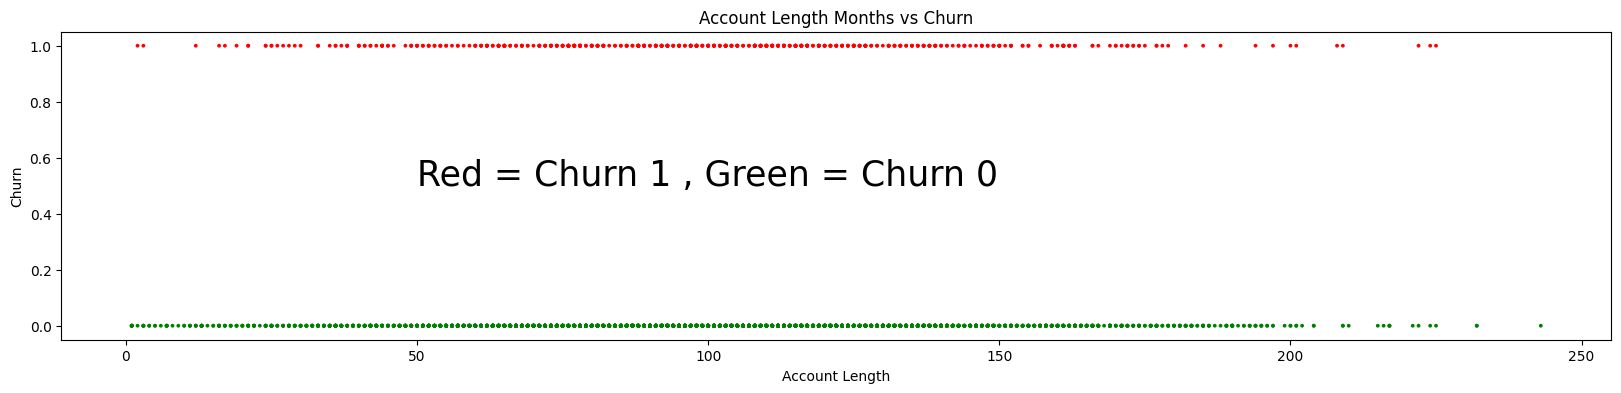

The median of the account lenght is : Account_Length_Months    100.0
dtype: float64
The median of the account lenght with Churn 1 is : Account_Length_Months    102.0
dtype: float64


In [16]:
#plotting scattered graph Churn vs account_lenght_months

x = train_df[['Account_Length_Months']]
z = y[['Account_Length_Months']]
color = []
for i in range(train_df.shape[0]):
  if train_df.Churn.at[i] == 1:
    color.append('red')
  else:
    color.append('green')
plt.figure(figsize=(20,4))
plt.scatter(x,train_df[['Churn']],color=color,s=3)
plt.title('Account Length Months vs Churn')
plt.xlabel('Account Length')
plt.ylabel('Churn')
plt.text(50,0.5,'Red = Churn 1 , Green = Churn 0', size=25)
plt.show()

print(f'The median of the account lenght is : {x.median(axis=0)}')
print(f'The median of the account lenght with Churn 1 is : {z.median(axis=0)}')

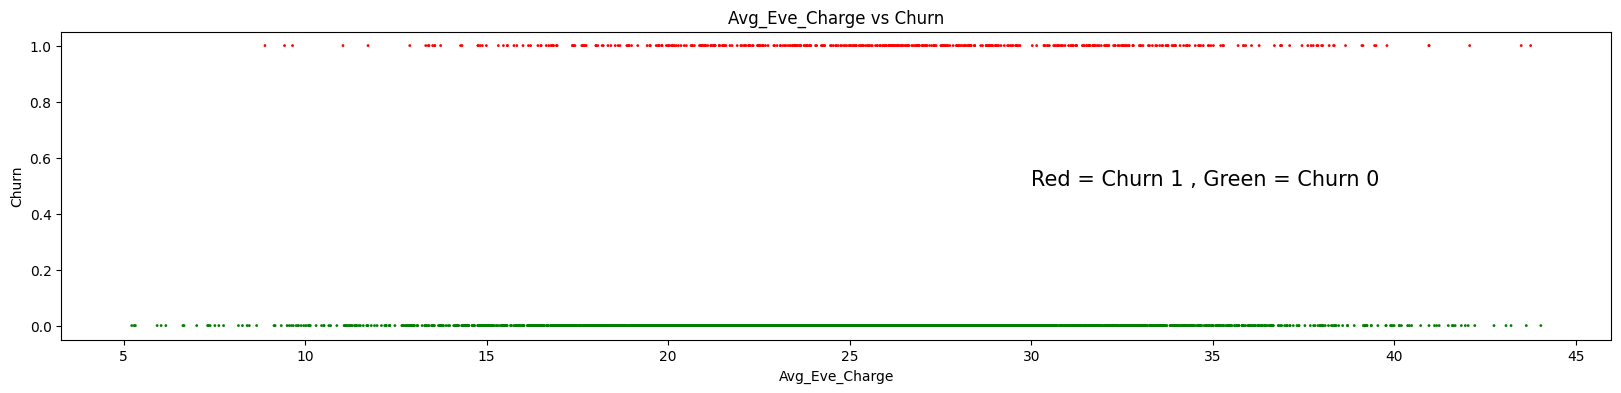

The median of the Avg_Eve_Charge is : Avg_Eve_Charge    25.05
dtype: float64
The median of the Avg_Eve_Charge with Churn 1 is : Avg_Eve_Charge    26.23
dtype: float64


In [17]:
#plotting scattered graph Churn vs Average Eve Charge

z = train_df[['Avg_Eve_Charge']]
x = y[['Avg_Eve_Charge']]
plt.figure(figsize=(20,4))
plt.scatter(z,train_df[['Churn']],color=color,s=1)
plt.title('Avg_Eve_Charge vs Churn')
plt.xlabel('Avg_Eve_Charge')
plt.ylabel('Churn')
plt.text(30,0.5,'Red = Churn 1 , Green = Churn 0', size=15)
plt.show()
print(f'The median of the Avg_Eve_Charge is : {z.median(axis=0)}')
print(f'The median of the Avg_Eve_Charge with Churn 1 is : {x.median(axis=0)}')

The median of the Avg_Night_Calls with Churn 0 is: Avg_Night_Calls    106.0
dtype: float64
The median of the Avg_Night_Calls with Churn 1 is : Avg_Night_Calls    105.0
dtype: float64


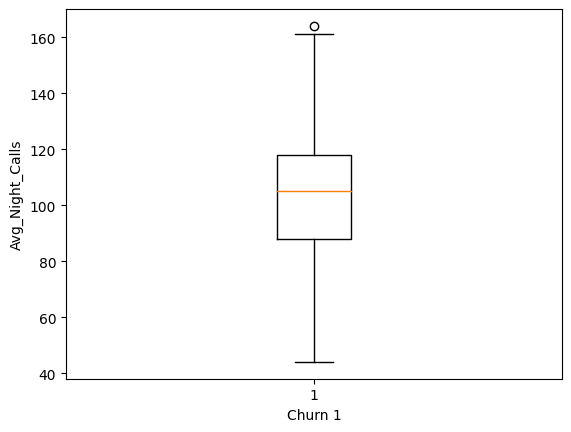

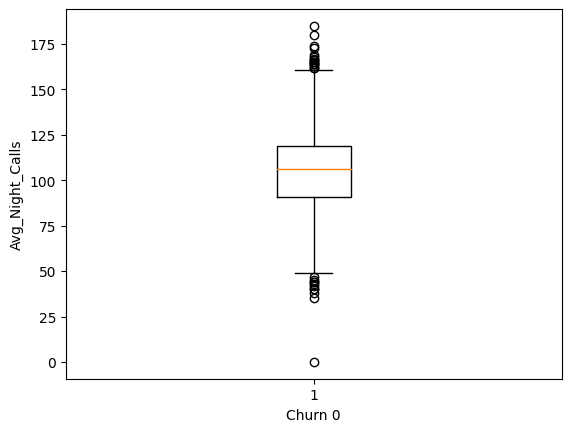

In [18]:
#plotting Box & whisker graph Churn vs Average night Calls

x = y[['Avg_Night_Calls']]
w = q[['Avg_Night_Calls']]
print(f'The median of the Avg_Night_Calls with Churn 0 is: {w.median(axis=0)}')
print(f'The median of the Avg_Night_Calls with Churn 1 is : {x.median(axis=0)}')
plt.boxplot(x)
plt.xlabel('Churn 1')
plt.ylabel('Avg_Night_Calls')
plt.show()

plt.boxplot(w)
plt.xlabel('Churn 0')
plt.ylabel('Avg_Night_Calls')
plt.show()

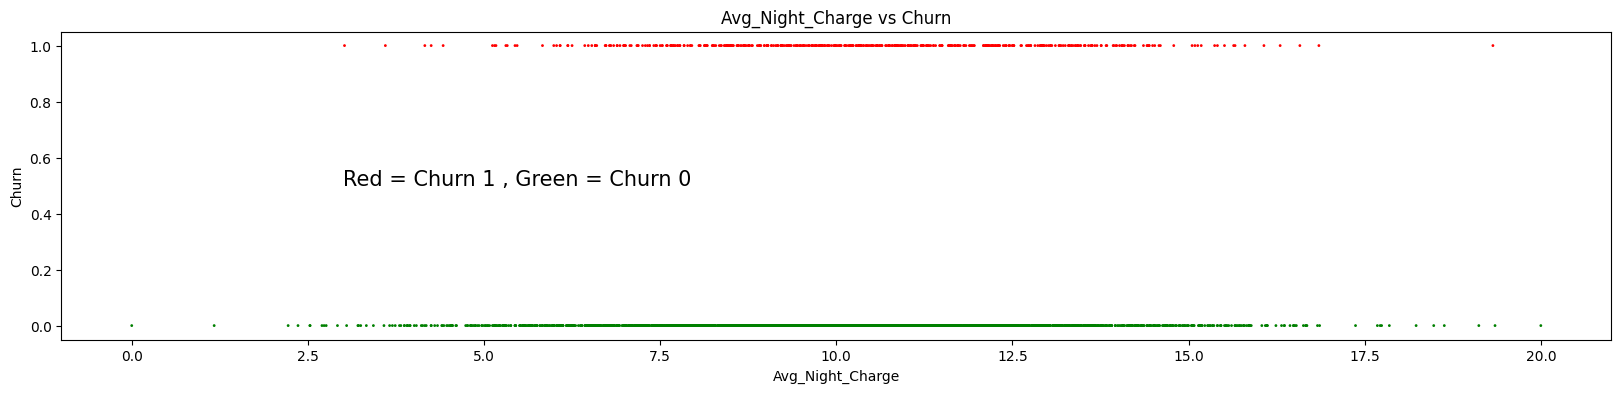

The median of the Avg_Night_Charge is: Avg_Night_Charge    10.19
dtype: float64
The median of the Avg_Night_Charge with Churn 1 is : Avg_Night_Charge    10.405
dtype: float64


In [19]:
#plotting scattered graph Churn vs Average Night Charge

z = train_df[['Avg_Night_Charge']]
x = y[['Avg_Night_Charge']]
plt.figure(figsize=(20,4))
plt.scatter(z,train_df[['Churn']],color=color,s=1)
plt.title('Avg_Night_Charge vs Churn')
plt.xlabel('Avg_Night_Charge')
plt.ylabel('Churn')
plt.text(3,0.5,'Red = Churn 1 , Green = Churn 0', size=15)
plt.show()
print(f'The median of the Avg_Night_Charge is: {z.median(axis=0)}')
print(f'The median of the Avg_Night_Charge with Churn 1 is : {x.median(axis=0)}')

The median of the Avg_Intl_Charge with Churn 0 is: Avg_Intl_Charge    3.09
dtype: float64
The median of the Avg_Intl_Charge with Churn 1 is : Avg_Intl_Charge    3.195
dtype: float64


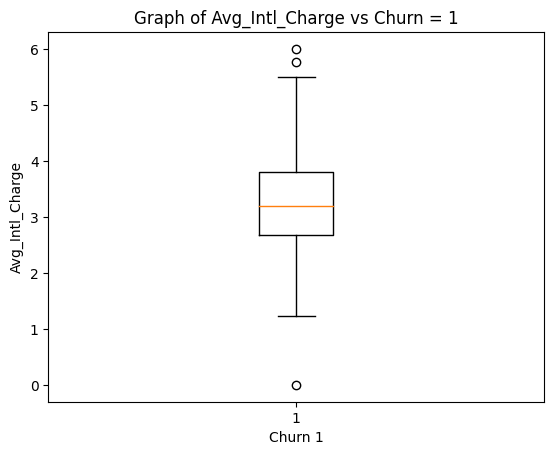

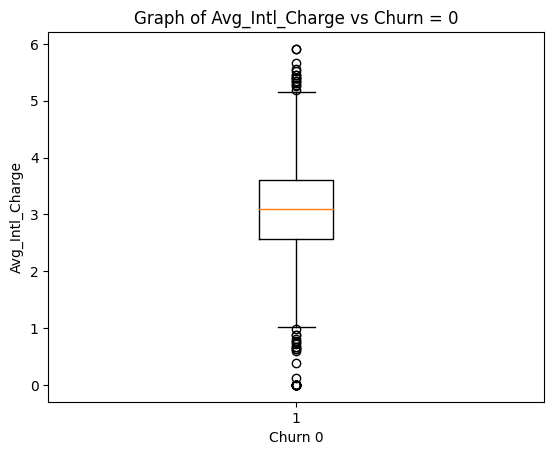

In [20]:
#plotting Box & whisker graph Churn vs Average Intl Calls

x = y[['Avg_Intl_Charge']]
w = q[['Avg_Intl_Charge']]
print(f'The median of the Avg_Intl_Charge with Churn 0 is: {w.median(axis=0)}')
print(f'The median of the Avg_Intl_Charge with Churn 1 is : {x.median(axis=0)}')
plt.boxplot(x)
plt.xlabel('Churn 1')
plt.ylabel('Avg_Intl_Charge')
plt.title('Graph of Avg_Intl_Charge vs Churn = 1')
plt.show()

plt.boxplot(w)
plt.xlabel('Churn 0')
plt.ylabel('Avg_Intl_Charge')
plt.title('Graph of Avg_Intl_Charge vs Churn = 0')
plt.show()